In [1]:
# importing the necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the csv file

df = pd.read_csv(r'C:\Users\Lavanya\Downloads\Email-Spam-detection\Email Spam detection\messages.csv')
df.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [3]:
# merging subject and messages to a single column

df["text"]=df["subject"].astype(str)+df["message"].astype(str)
df.drop("subject",axis=1,inplace=True)
df.drop("message",axis=1,inplace=True)
df.head()

label                                               text
0      0  job posting - apple-iss research centercontent...
1      0  nanlang classification grimes , joseph e . and...
2      0  query : letter frequencies for text identifica...
3      0  riska colleague and i are researching the diff...
4      0  request book informationearlier this morning i...

In [4]:
# finding the number of messages

df.shape

(2893, 2)

There are 2893 messages, that needs to be classified

In [5]:
# dropping duplicates and checking the new shape

df.drop_duplicates(inplace=True)
df.shape

(2876, 2)

There are 2876 entries after removing duplicates.

In [6]:
# looking at the count of each label

df['label'].value_counts()

0    2408
1     468
Name: label, dtype: int64

There are 468 spam messages

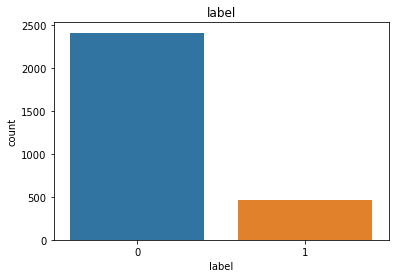

In [7]:
# visulazing count of each label

sns.countplot(df['label'])
plt.title("label")
plt.show()

In [8]:
# checking for null values

df.isnull().sum()

label    0
text     0
dtype: int64

There are no null values.

In [9]:
# converting all text to lower case

df['text']=df['text'].astype(str)
df['text']=df['text'].str.lower()
df.head()

label                                               text
0      0  job posting - apple-iss research centercontent...
1      0  nanlang classification grimes , joseph e . and...
2      0  query : letter frequencies for text identifica...
3      0  riska colleague and i are researching the diff...
4      0  request book informationearlier this morning i...

In [10]:
# importing the necessary libraries

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lavanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lavanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
def process_text(text):
    
    nopunct = [char for char in text if char not in string.punctuation]
    nopunct = ''.join(nopunct)
    
    stemmer = SnowballStemmer('english')
    stemm = [stemmer.stem(word) for word in nopunct.split()]
    
    clean_txt = [word for word in nopunct.split() if word not in stopwords.words('english')]
    
    return clean_txt

In [12]:
df["text"].head().apply(process_text)

0    [job, posting, appleiss, research, centerconte...
1    [nanlang, classification, grimes, joseph, e, b...
2    [query, letter, frequencies, text, identificat...
3    [riska, colleague, researching, differing, deg...
4    [request, book, informationearlier, morning, p...
Name: text, dtype: object

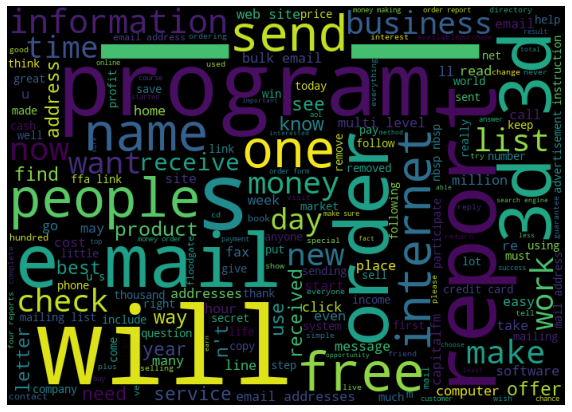

In [13]:
# Visualizing with wordcloud => spam: label = 1
#!pip3 install wordcloud

from wordcloud import WordCloud
spam_words = ' '.join(list(df[df['label']==1]['text']))
spam_wc = WordCloud(width=700,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

We can see that in spam mails -  will, free, order, email, report, program, 3d, people etc such words appear more

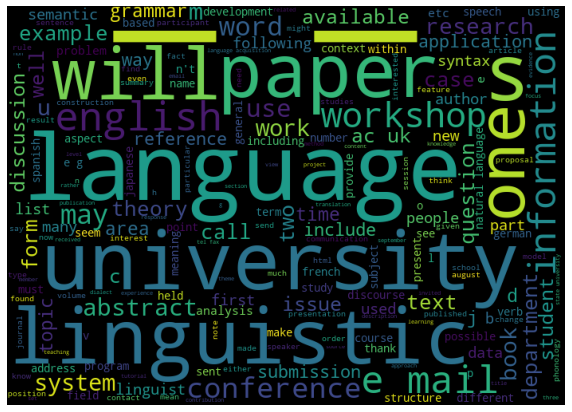

In [14]:
# non-spam: label = 0

non_spam_words = ' '.join(list(df[df['label']==0]['text']))
non_spam_wc = WordCloud(width=700,height=500).generate(non_spam_words)
plt.figure(figsize=(10,8))
plt.imshow(non_spam_wc)
plt.axis('off')
plt.show()

In [15]:
# feature extraction using Countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
text_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text'])
text_bow.shape

(2876, 66699)

In [16]:
# assigning input to x and target to y

x = text_bow
y = df['label']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42,stratify=y)

In [19]:
model = [MultinomialNB(),SVC(),DecisionTreeClassifier(),LinearSVC()]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of", m,"is",accuracy_score(y_test,predm))
    print("Confusion matrix \n",confusion_matrix(y_test,predm))
    print("Classification report \n",classification_report(y_test,predm))
    print("\n")

Accuracy score of MultinomialNB() is 0.9930555555555556
Confusion matrix 
 [[480   2]
 [  2  92]]
Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       482
           1       0.98      0.98      0.98        94

    accuracy                           0.99       576
   macro avg       0.99      0.99      0.99       576
weighted avg       0.99      0.99      0.99       576



Accuracy score of SVC() is 0.9496527777777778
Confusion matrix 
 [[482   0]
 [ 29  65]]
Classification report 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       482
           1       1.00      0.69      0.82        94

    accuracy                           0.95       576
   macro avg       0.97      0.85      0.89       576
weighted avg       0.95      0.95      0.95       576



Accuracy score of DecisionTreeClassifier() is 0.9461805555555556
Confusion matrix 
 [[468  14]
 [ 17  77]]
C

We can see that multinomialNB works best. Next, we will look at the cross validation score to see whether there is any overfitting.

In [22]:
from sklearn.model_selection import cross_val_score

print("Cross_val_score for",MultinomialNB,'is ',cross_val_score(MultinomialNB(),x,y,cv=5).mean())

Cross_val_score for <class 'sklearn.naive_bayes.MultinomialNB'> is  0.9913073671497585


From the cross validation score it is clear that the model is not overfitting.

In [23]:
# saving the model - MultinomialNB

import joblib
joblib.dump(MultinomialNB(),"spam_classification.pkl")

['spam_classification.pkl']